In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv("chennai.csv")

# Combine year, month, and day into a single date column
data['Date'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY']])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Drop unnecessary columns
data.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)

# Resample to monthly average temperature
monthly_avg_temp = data.resample('M').mean()

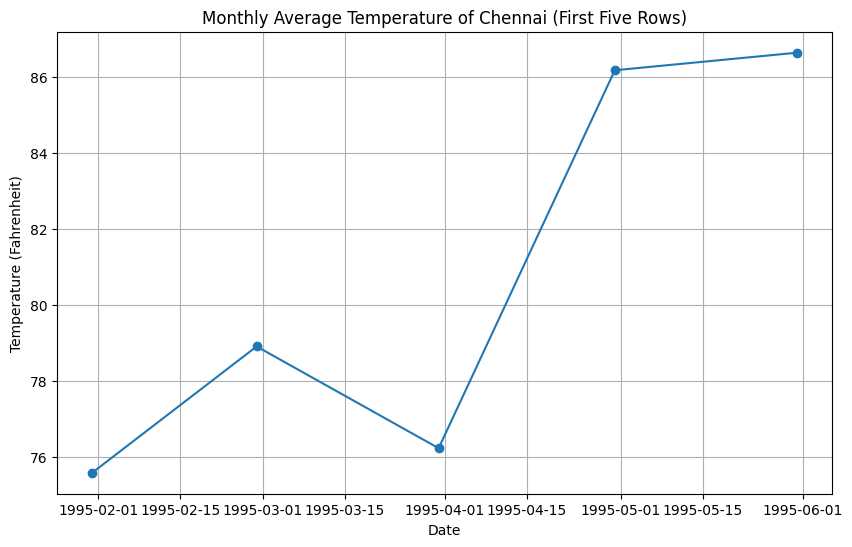

In [19]:
# Plotting the first five rows of data
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp[:5], marker='o')
plt.title('Monthly Average Temperature of Chennai (First Five Rows)')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True)
plt.show()

In [20]:
# Time series decomposition
result = seasonal_decompose(monthly_avg_temp['TEMPERATURE'], model='additive')

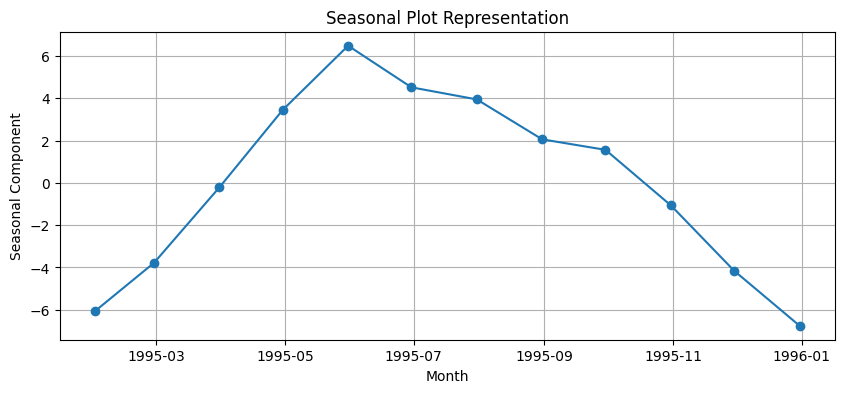

In [21]:
# Seasonal plot representation
plt.figure(figsize=(10, 4))
plt.plot(result.seasonal[:12], marker='o')
plt.title('Seasonal Plot Representation')
plt.xlabel('Month')
plt.ylabel('Seasonal Component')
plt.grid(True)
plt.show()


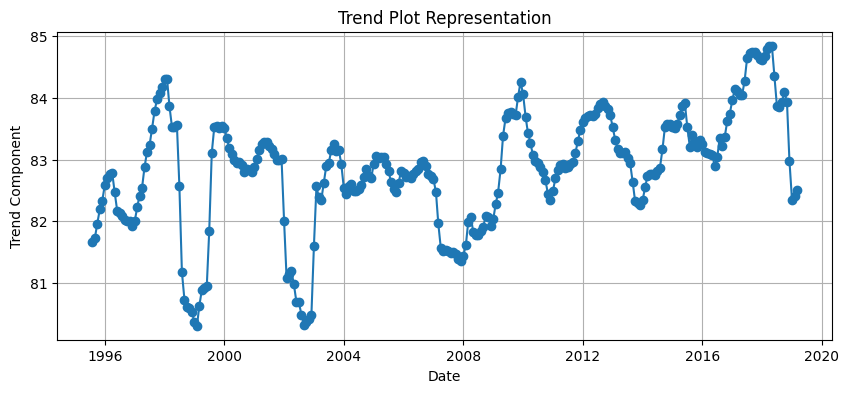

In [23]:
# Trend plot representation
plt.figure(figsize=(10, 4))
plt.plot(result.trend, marker='o')
plt.title('Trend Plot Representation')
plt.xlabel('Date')
plt.ylabel('Trend Component')
plt.grid(True)
plt.show()

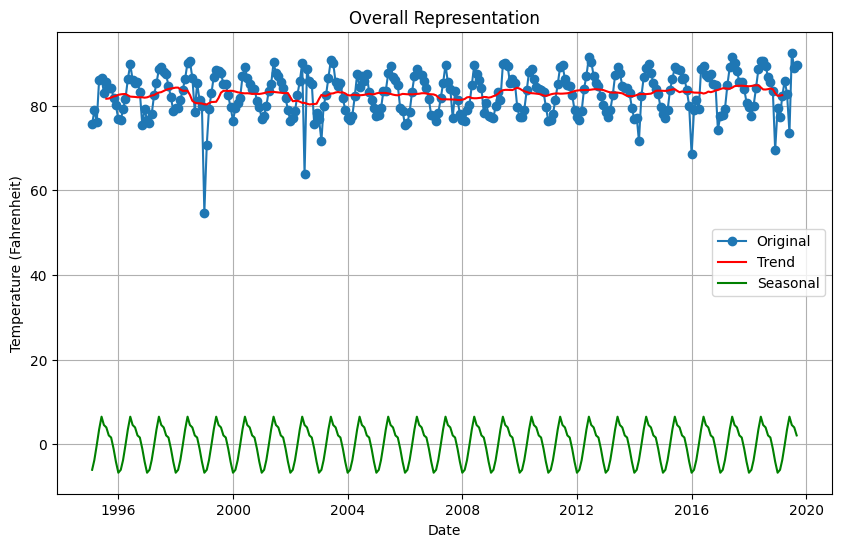

In [24]:
# Overall representation (original data)
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp, marker='o', label='Original')
plt.plot(result.trend, color='red', label='Trend')
plt.plot(result.seasonal, color='green', label='Seasonal')
plt.title('Overall Representation')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.grid(True)
plt.show()